# Redes Neurais Recorrentes 


## Problema de Classificação de Sequências com Redes Neurais Recorrentes

Neste notebook, vamos aplicar uma RNN para classificar imagens de dígitos escritos à mão. Para isso, vamos usar o dataset MNIST, que contém imagens de dígitos escritos à mão. Cada imagem é de tamanho 28x28 pixels e está em escala de cinza. O dataset MNIST contém 60.000 imagens de treinamento e 10.000 imagens de teste. Cada imagem é rotulada com o dígito que representa.

In [3]:
# Bibliotecas necessárias 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

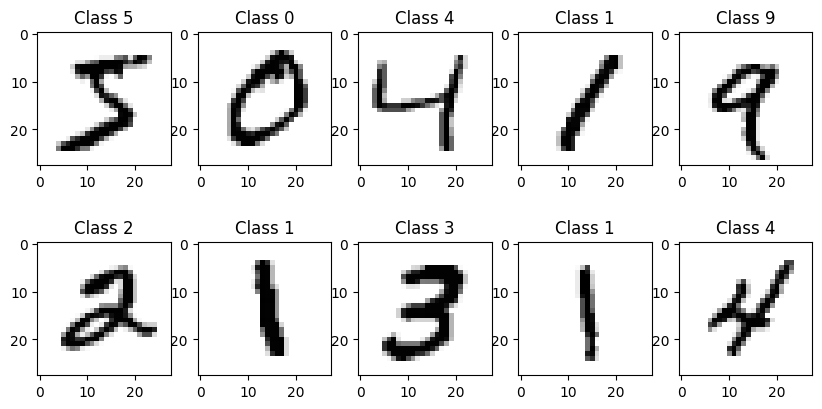

In [4]:
# carregando o dataset: imagens de dígitos manuscritos
# o objetivo é classificar as imagens em 10 classes (dígitos de 0 a 9)
# cada imagem tem dimensões 28x28 pixels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# exibe as imagens
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='binary')
    ax.set(title = "Class {}".format(y_train[i]))
plt.show()

In [6]:
# normaliza os dados
x_train = x_train / 255
x_test = x_test / 255

# converte os dados para o formato de entrada da rede
# convertemos as imagens de 28x28 pixels para uma sequência de 28 vetores de 28 elementos
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

# converte os dados para o formato one-hot, ou seja, para o formato de saída da rede
# que é um vetor de 10 elementos, onde cada elemento representa a probabilidade de
# a imagem pertencer a uma das 10 classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [7]:
# cria o modelo
model = Sequential()
model.add(SimpleRNN(128, input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               20096     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compila o modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [10]:
# treina o modelo
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0850 - accuracy: 0.9756 - val_loss: 0.0880 - val_accuracy: 0.9752
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.0805 - accuracy: 0.9768 - val_loss: 0.1155 - val_accuracy: 0.9678
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.0775 - accuracy: 0.9778 - val_loss: 0.1057 - val_accuracy: 0.9708
Epoch 4/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0753 - accuracy: 0.9775 - val_loss: 0.0906 - val_accuracy: 0.9757
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0724 - accuracy: 0.9788 - val_loss: 0.0926 - val_accuracy: 0.9738
Epoch 6/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0688 - accuracy: 0.9801 - val_loss: 0.1109 - val_accuracy: 0.9699
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0704 - accuracy: 0.9796 - val_loss: 0.0876 - val_accuracy:

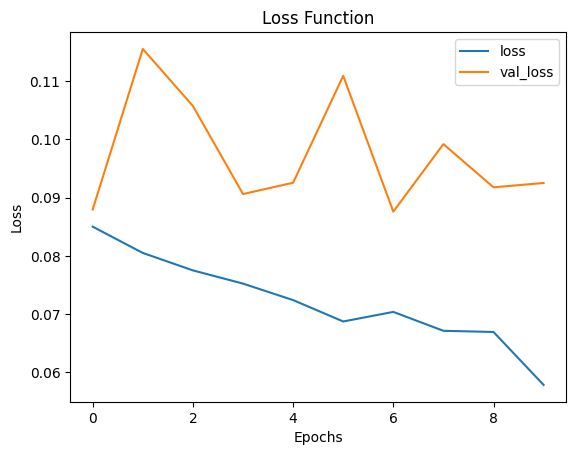

In [13]:
# plotando a função de perda
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

In [14]:
# avalia o modelo
loss, acc = model.evaluate(x_test, y_test)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0925 - accuracy: 0.9757
Loss: 0.09
Accuracy: 0.98
